<a href="https://colab.research.google.com/github/Jinyu-Luo/CHL5230-Datathon1/blob/main/Datathon_1_BMI_Lily_Edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# set up libraries

from google.colab import files
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

uploaded = files.upload()

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


In [ ]:
from pandas.io.stata import BytesIO
# Read dataset into Pandas dataframe
data = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))

# display first few rows of data
data.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
# Info on data
print(data.shape)

print(data.columns)

(23535, 10)
Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')


In [ ]:
# Summary Statistics
print(data.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

In [ ]:
# Look at unique values for each variable

for column in ['Gender','Fast_Food_Frequency','Screen_Time']:
  print(f"{column} : {sorted(data[column].unique())}")

Gender : ['Female', 'Male']
Fast_Food_Frequency : [0, 1, 2, 3, 4]
Screen_Time : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]



- age, caloric intake, sugar intake, physical activity, BMI are continuous
- fast food, screen time is categorical

In [ ]:
# Label encoding gender variable

data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})

data.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,1,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,1,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,0,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,1,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,1,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
# check for missing values
print(data.isnull().sum())

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
BMI_Cat                0
dtype: int64


- No missing values

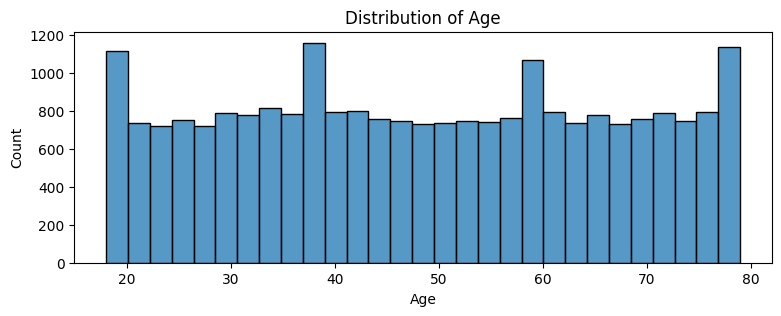

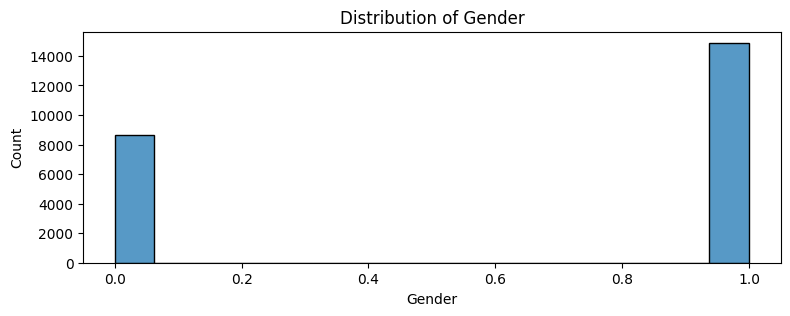

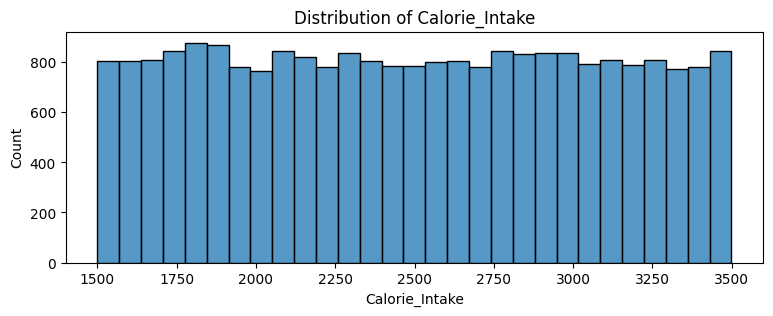

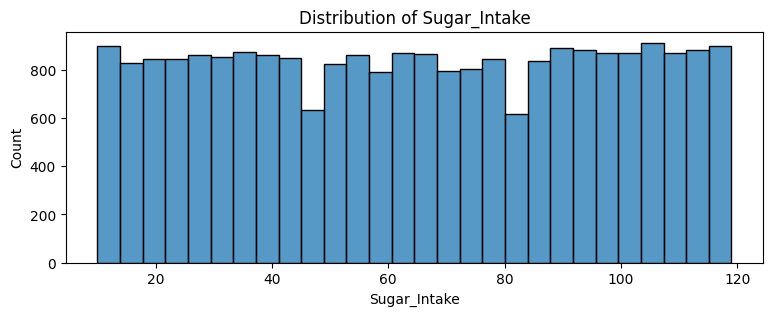

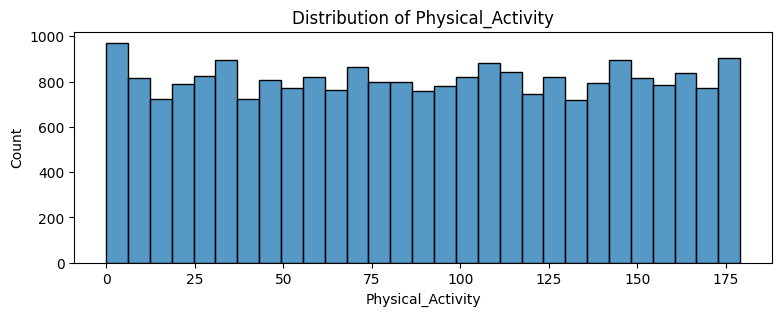

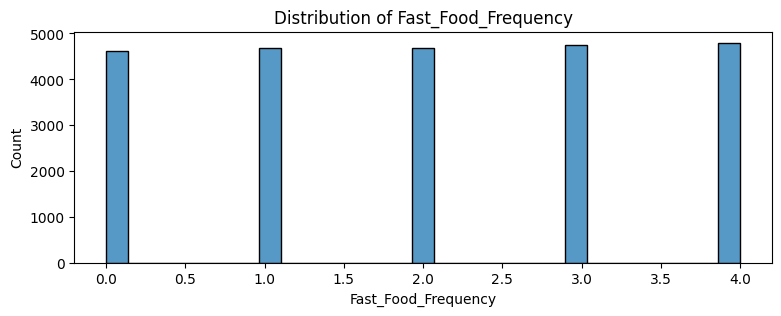

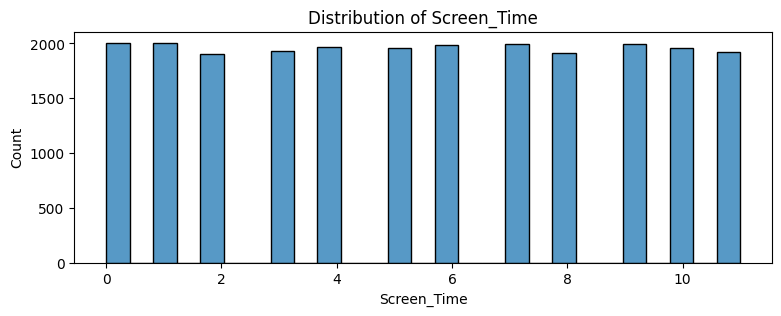

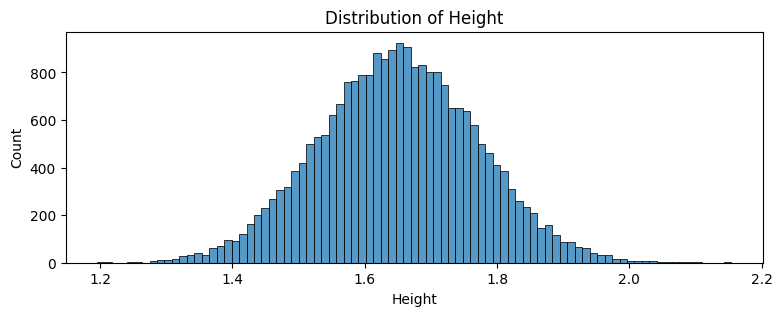

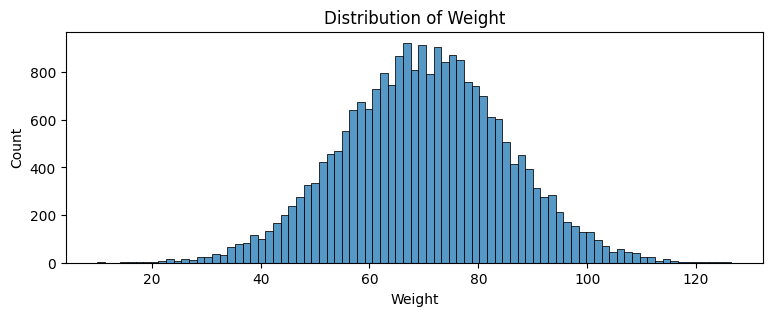

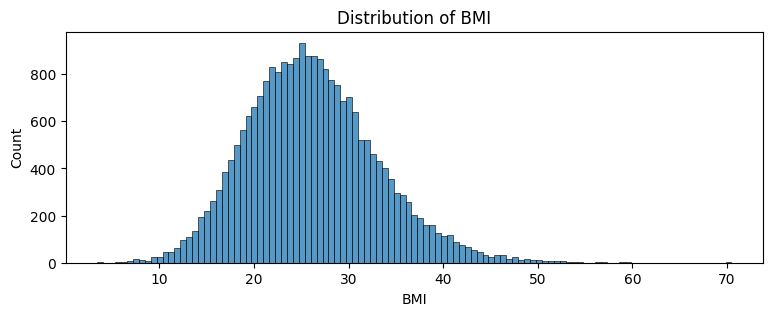

In [ ]:
  # Visualize histograms for all variables

  for column in data.columns:
    plt.figure(figsize=(9, 3))
    sns.histplot(data[column], kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


We can see that:
- gender: more females and males
- BMI follows normal distribution, could be an issue with underfeeding and overfeeding
- rest of variables are fairly evenly distributed

In [19]:
# Re-coding BMI into categories
def bmi_categorize(bmi):
  if bmi < 18.5:
    return '0' # underweight
  elif 18.5 <= bmi < 25:
    return '1' # normal
  elif 25 <= bmi < 30:
    return '2' # pre-obesity
  elif 30 <= bmi < 35:
    return '3' # obesity class 1
  elif 35 <= bmi < 39.9:
    return '4' # obesity class 2
  else:
    return '5' # obesity class 3


data['BMI_Cat'] = data["BMI"].apply(bmi_categorize)
data['BMI_Cat'] = sorted(data['BMI_Cat'])
data.head()


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,BMI_Cat
0,56,1,3091,90,160,4,1,1.569070,81.199394,32.981343,0
1,69,1,2090,106,27,0,9,1.629449,74.273566,27.973877,0
2,46,0,2938,11,45,2,3,1.637726,71.453466,26.640417,0
3,32,1,3022,48,112,1,8,1.514198,98.163045,42.813720,0
4,60,1,2350,83,115,0,7,1.410559,57.323914,28.810685,0


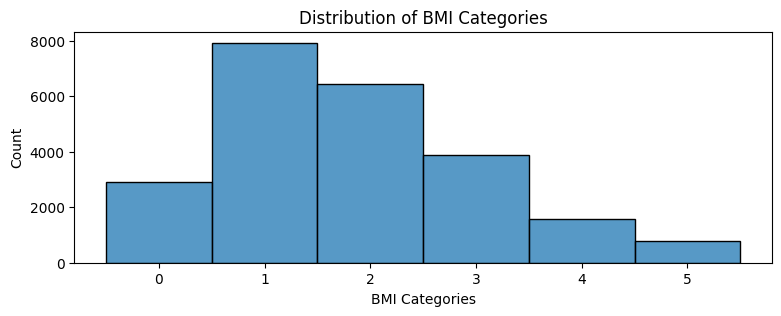

In [20]:
# looking at distribution of BMI
plt.figure(figsize=(9,3))
sns.histplot(data["BMI_Cat"], kde=False)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Categories')
plt.ylabel("Count")
plt.show()

- We see that 'underweight' category has much smaller sample size compared to rest of categories
- 'normal' BMI has highest sample
- lets try to even it out by reducing the number of bins

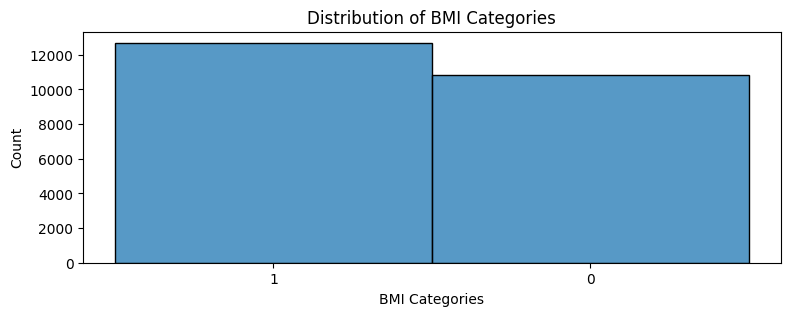

In [ ]:
# Re-coding BMI into 2 bins
def bmi_categorize(bmi):
  if bmi < 25:
    return '0' # underweight and normal
  else:
    return '1' # obese/overwight, high risk

data['BMI_Cat'] = data["BMI"].apply(bmi_categorize)
data.head()

# looking at distribution of BMI
plt.figure(figsize=(9,3))
sns.histplot(data["BMI_Cat"], bins = 2, kde=False)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Categories')
plt.ylabel("Count")
plt.show()

Looks more even now, 'overweight' category still has higher sample size

In [ ]:
# Elbow Method

# split data into features and labels
X = data[["Age","Gender","Calorie_Intake","Sugar_Intake","Physical_Activity",'Fast_Food_Frequency','Screen_Time']]
y = data["BMI_Cat"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Choose a range of k values to test
k_values = range(1, 20)

# A list to keep track of the error rates for each k value.
errors = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

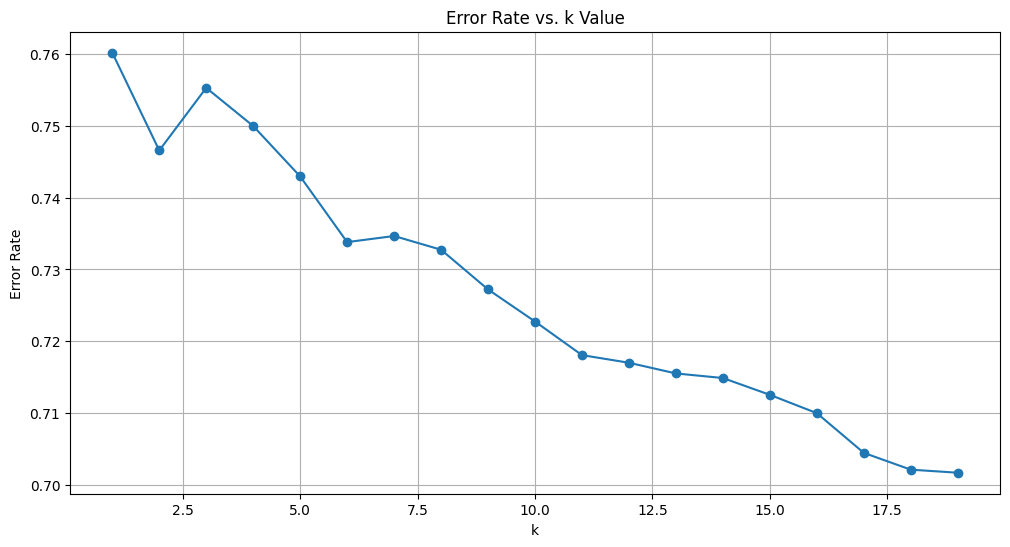

In [ ]:
# Plotting relationship between k value and error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

- Looks like K with minumum error rate is 600
- however, errro rate is minimum 45% which is still very high

In [21]:
# KNN model

# split data into features and labels
X = data[["Age","Gender","Calorie_Intake","Sugar_Intake","Physical_Activity",'Fast_Food_Frequency','Screen_Time']]
y = data["BMI_Cat"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors= 20, metric = 'euclidean')
knn.fit(X_train, y_train)

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  21  363  150   23    0    0]
 [  52 1038  431   68    1    0]
 [  40  828  363   70    2    0]
 [  32  472  242   30    0    0]
 [  11  213   71   16    0    0]
 [   9  101   46   14    0    0]]
              precision    recall  f1-score   support

           0       0.13      0.04      0.06       557
           1       0.34      0.65      0.45      1590
           2       0.28      0.28      0.28      1303
           3       0.14      0.04      0.06       776
           4       0.00      0.00      0.00       311
           5       0.00      0.00      0.00       170

    accuracy                           0.31      4707
   macro avg       0.15      0.17      0.14      4707
weighted avg       0.23      0.31      0.25      4707



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



- when setting n-neighbours to 600, f1 score was 0 = 0.02, 0.70 meaning good at differentiating high BMI only
- when setting n-neighbours to 20, f1 score was 0 = 0.45, 1 = 0.55

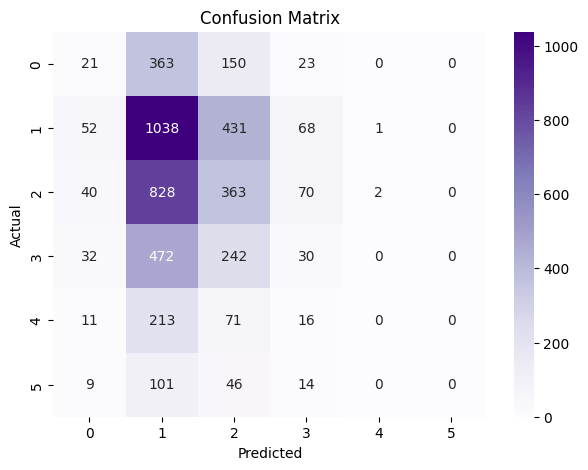

In [22]:
# Visualization of Confusion Matrix Heatmap

# Get unique classes
classes = data["BMI_Cat"].unique()

# plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- looks like model prediction for 'overweight/obese' is good but not for 'normal/underwight'

In [ ]:
# KNN model with SMOTE
from imblearn.over_sampling import SMOTE  # Import SMOTE for resampling

# KNN model

# split data into features and labels
X = data[["Age",'Gender',"Calorie_Intake","Sugar_Intake","Physical_Activity",'Fast_Food_Frequency']]
y = data["BMI_Cat"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE resampling to balance the classes
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=600)
knn.fit(X_train_resampled, y_train_resampled)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[ 64 180  92  40 112 125]
 [178 410 195 119 303 357]
 [148 338 176  99 228 299]
 [ 78 186 123  59 138 179]
 [ 30  78  45  27  58  74]
 [ 17  44  28  12  29  39]]
              precision    recall  f1-score   support

           0       0.12      0.10      0.11       613
           1       0.33      0.26      0.29      1562
           2       0.27      0.14      0.18      1288
           3       0.17      0.08      0.11       763
           4       0.07      0.19      0.10       312
           5       0.04      0.23      0.06       169

    accuracy                           0.17      4707
   macro avg       0.17      0.17      0.14      4707
weighted avg       0.23      0.17      0.19      4707



- poor precision(Precision is a measure of how many of the positive predictions made are correct) for model
- Used SMOTE resamplig to oversample the minority class and make the dataset more balanced
- Recall is a measure of how many of the positive cases the classifier correctly predicted
- F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two
- confusion matrix is much more balanced here